In [26]:
#%pip install pandas
#%pip install matplotlib
#%pip install pillow
#%pip install scikit-learn

In [3]:
import tensorflow as tf
import pandas as pd
import os
import numpy as np
import random
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array

In [4]:
IMG_HEIGHT, IMG_WIDTH = 128, 128  
BATCH_SIZE = 32
DATA_DIR = 'Dataset/' 

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
)

In [30]:
train_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

Found 11040 images belonging to 2 classes.


In [31]:
validation_generator = train_datagen.flow_from_directory(
    DATA_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 2759 images belonging to 2 classes.


In [32]:
num_classes = len(train_generator.class_indices)
print(num_classes)

2


In [33]:
model = Sequential([                  
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(2,2),
    
    BatchNormalization(),
        
    Conv2D(64, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),
    
    Conv2D(256, (3,3), activation='relu', padding='same'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=l2(0.0001)),
    Dense(2, activation='softmax'),
])

In [34]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                        

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True,)

history = model.fit(
    train_generator,
    epochs=20,
    shuffle=True,
    validation_data=validation_generator,
    callbacks=[early_stopping]
)

Epoch 1/20
345/345 [==============================] - 18s 46ms/step - loss: 0.4149 - accuracy: 0.8447 - val_loss: 0.5175 - val_accuracy: 0.7847
Epoch 2/20
345/345 [==============================] - 10s 30ms/step - loss: 0.3050 - accuracy: 0.8825 - val_loss: 0.5711 - val_accuracy: 0.7456
Epoch 3/20
345/345 [==============================] - 10s 29ms/step - loss: 0.2801 - accuracy: 0.8924 - val_loss: 0.4090 - val_accuracy: 0.8155
Epoch 4/20
345/345 [==============================] - 11s 30ms/step - loss: 0.2591 - accuracy: 0.9014 - val_loss: 0.5264 - val_accuracy: 0.7862
Epoch 5/20
345/345 [==============================] - 11s 31ms/step - loss: 0.2433 - accuracy: 0.9075 - val_loss: 0.4057 - val_accuracy: 0.8460
Epoch 6/20
345/345 [==============================] - 10s 30ms/step - loss: 0.2293 - accuracy: 0.9135 - val_loss: 0.4469 - val_accuracy: 0.8217
Epoch 7/20
345/345 [==============================] - 11s 31ms/step - loss: 0.2197 - accuracy: 0.9198 - val_loss: 0.4982 - val_accuracy:

In [37]:
loss, accuracy = model.evaluate(validation_generator)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

87/87 [==============================] - 2s 24ms/step - loss: 0.4057 - accuracy: 0.8460
Test Loss: 0.40566951036453247
Test Accuracy: 0.8459587097167969


In [38]:
model.save('NN_cancer_model.h5')

In [7]:
model = load_model('NN_cancer_model.h5')

1
1/1 [==============================] - 0s 16ms/step
[[0.98020166 0.01979829]]
[0]
predicted_value 1


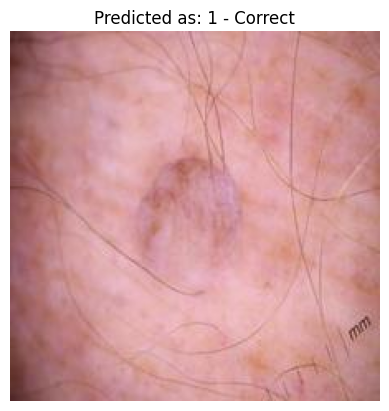

1/1 [==============================] - 0s 19ms/step
[[0.9691974  0.03080255]]
[0]
predicted_value 1


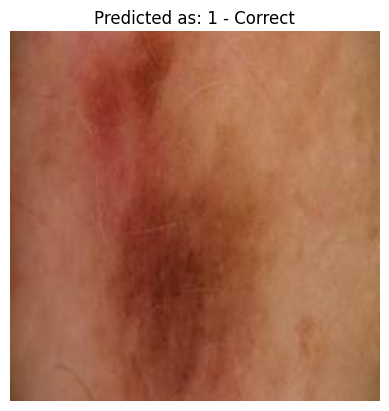

1/1 [==============================] - 0s 19ms/step
[[0.9963117  0.00368828]]
[0]
predicted_value 1


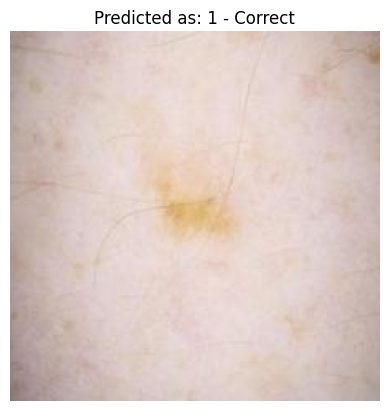

1/1 [==============================] - 0s 21ms/step
[[0.8119526  0.18804738]]
[0]
predicted_value 1


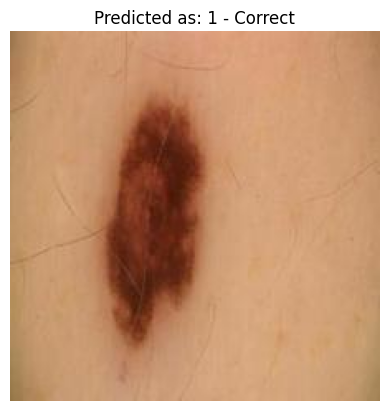

1/1 [==============================] - 0s 18ms/step
[[0.9816753  0.01832464]]
[0]
predicted_value 1


1/1 [==============================] - 0s 18ms/step
[[0.99382824 0.00617177]]
[0]
predicted_value 1


1/1 [==============================] - 0s 19ms/step
[[0.9970703  0.00292972]]
[0]
predicted_value 1


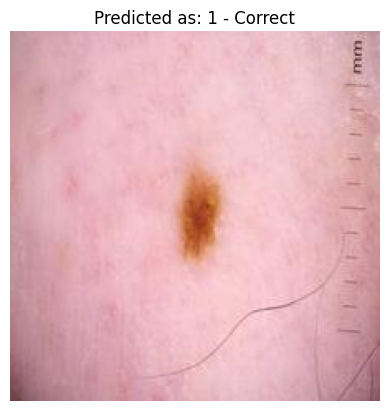

1/1 [==============================] - 0s 18ms/step
[[0.9986104  0.00138963]]
[0]
predicted_value 1


1/1 [==============================] - 0s 21ms/step
[[0.99351996 0.00648004]]
[0]
predicted_value 1


1/1 [==============================] - 0s 22ms/step
[[0.40586492 0.59413505]]
[1]
predicted_value 2


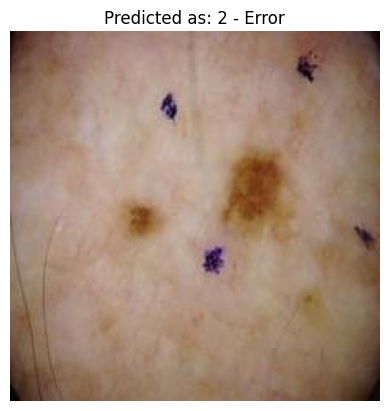

1/1 [==============================] - 0s 20ms/step
[[0.9755579  0.02444207]]
[0]
predicted_value 1


1/1 [==============================] - 0s 20ms/step
[[0.9329873  0.06701278]]
[0]
predicted_value 1


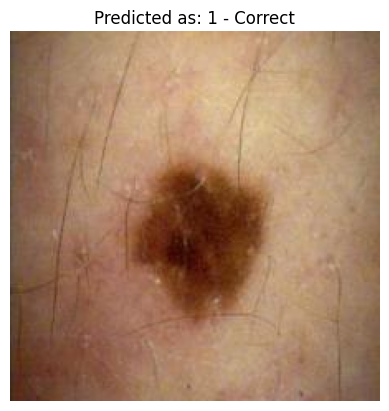

1/1 [==============================] - 0s 25ms/step
[[0.9227678  0.07723215]]
[0]
predicted_value 1


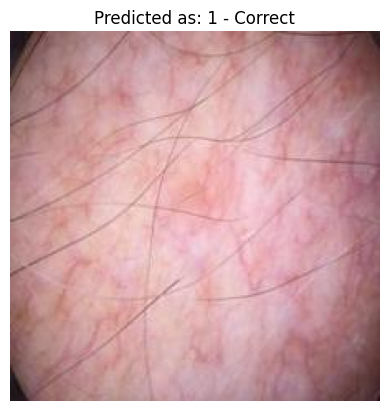

1/1 [==============================] - 0s 20ms/step
[[0.9964234  0.00357659]]
[0]
predicted_value 1


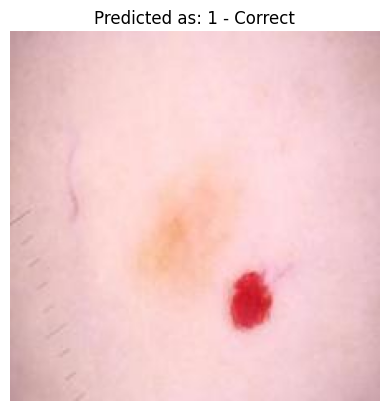

1/1 [==============================] - 0s 19ms/step
[[0.6047808 0.3952192]]
[0]
predicted_value 1


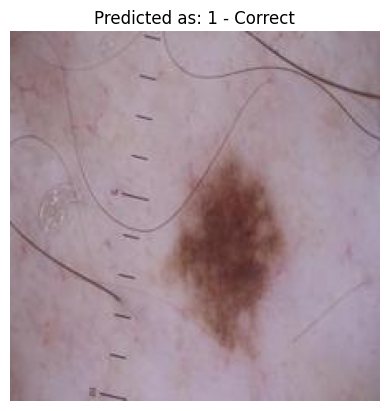

1/1 [==============================] - 0s 19ms/step
[[0.86514264 0.13485743]]
[0]
predicted_value 1


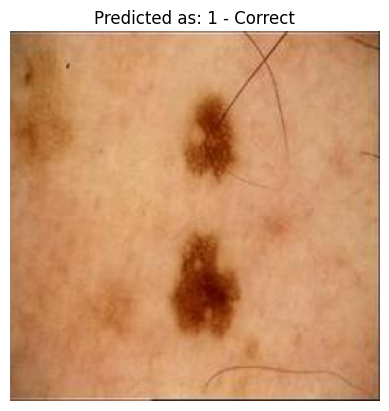

1/1 [==============================] - 0s 20ms/step
[[0.762471   0.23752898]]
[0]
predicted_value 1


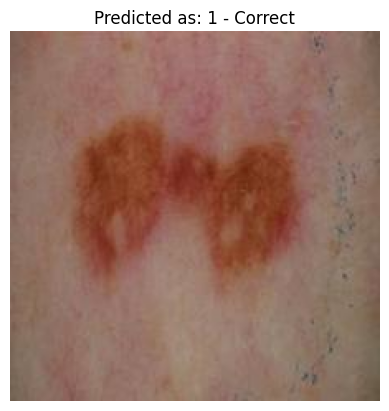

1/1 [==============================] - 0s 19ms/step
[[0.9746912  0.02530874]]
[0]
predicted_value 1


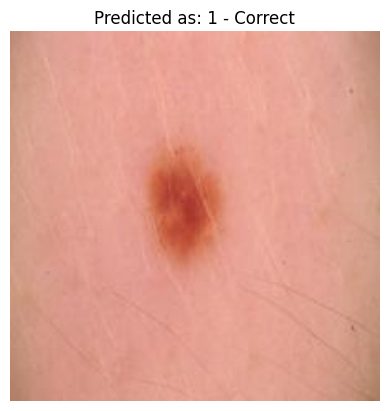

1/1 [==============================] - 0s 20ms/step
[[0.9841493  0.01585075]]
[0]
predicted_value 1


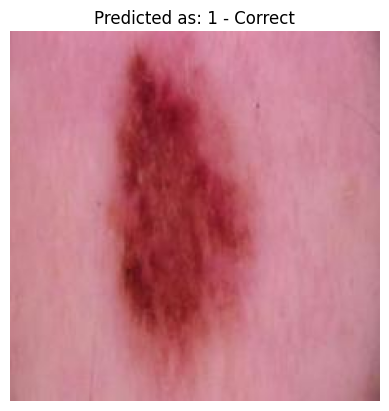

1/1 [==============================] - 0s 29ms/step
[[0.96145594 0.0385441 ]]
[0]
predicted_value 1


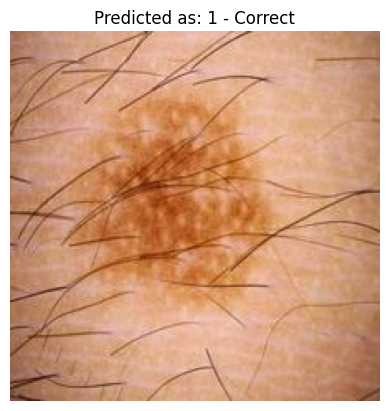

1/1 [==============================] - 0s 19ms/step
[[0.9851312  0.01486884]]
[0]
predicted_value 1


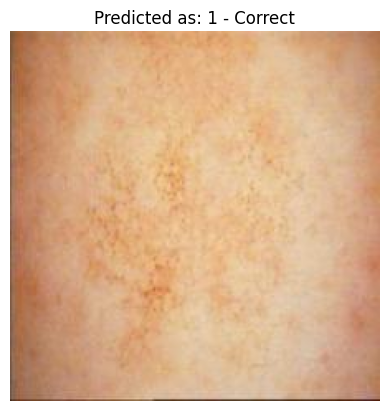

1/1 [==============================] - 0s 31ms/step
[[0.9983494  0.00165059]]
[0]
predicted_value 1


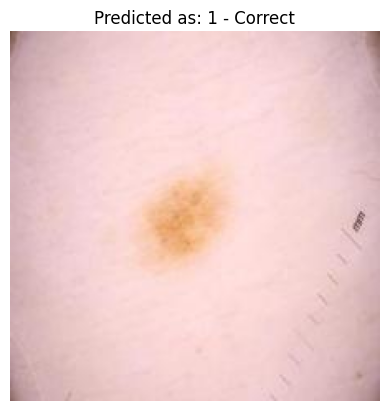

1/1 [==============================] - 0s 27ms/step
[[0.85096943 0.14903061]]
[0]
predicted_value 1


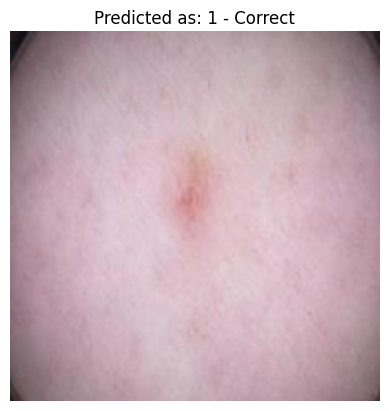

1/1 [==============================] - 0s 19ms/step
[[0.9833603  0.01663971]]
[0]
predicted_value 1


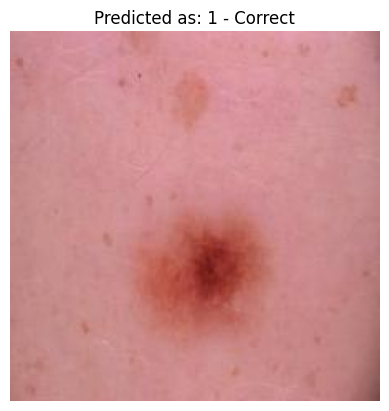

1/1 [==============================] - 0s 18ms/step
[[0.9513757  0.04862429]]
[0]
predicted_value 1


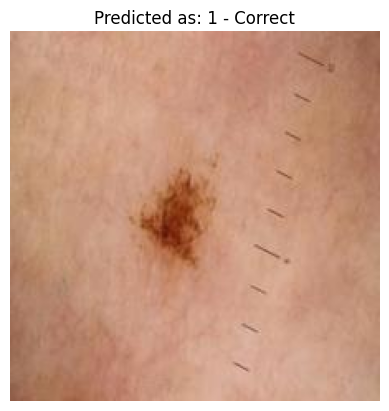

1/1 [==============================] - 0s 18ms/step
[[0.99850744 0.00149253]]
[0]
predicted_value 1


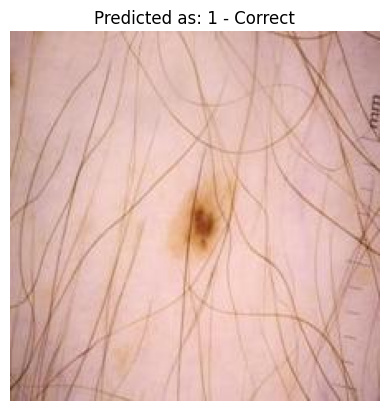

1/1 [==============================] - 0s 20ms/step
[[0.9611771  0.03882283]]
[0]
predicted_value 1


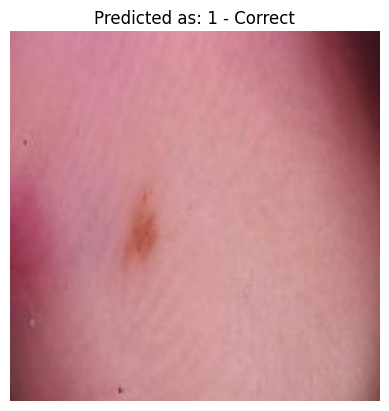

1/1 [==============================] - 0s 27ms/step
[[0.9985929 0.0014071]]
[0]
predicted_value 1


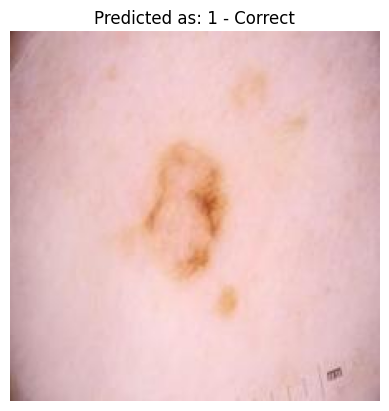

1/1 [==============================] - 0s 19ms/step
[[0.8477299  0.15227005]]
[0]
predicted_value 1


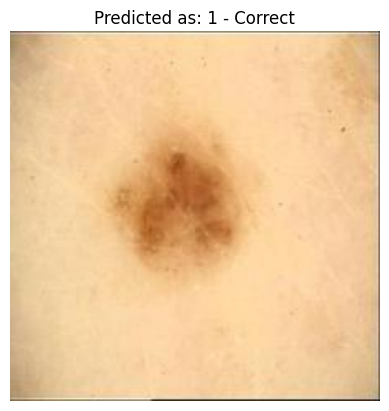

1/1 [==============================] - 0s 19ms/step
[[0.9985507  0.00144932]]
[0]
predicted_value 1


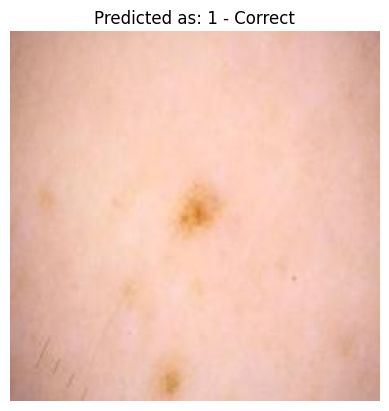

1/1 [==============================] - 0s 20ms/step
[[0.996612   0.00338792]]
[0]
predicted_value 1


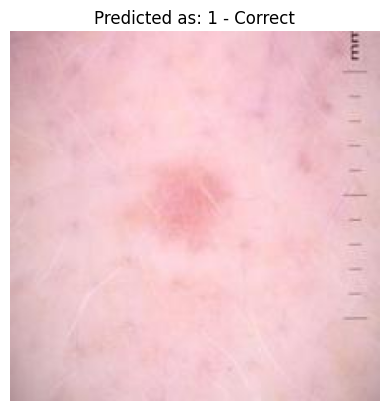

1/1 [==============================] - 0s 20ms/step
[[0.9940753  0.00592466]]
[0]
predicted_value 1


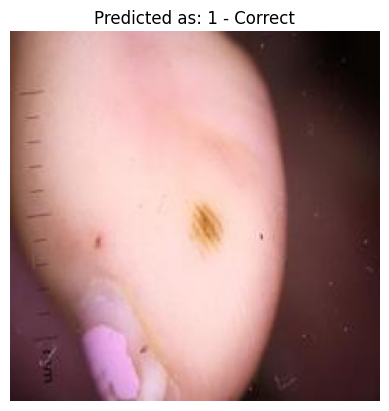

1/1 [==============================] - 0s 22ms/step
[[0.8017007  0.19829936]]
[0]
predicted_value 1


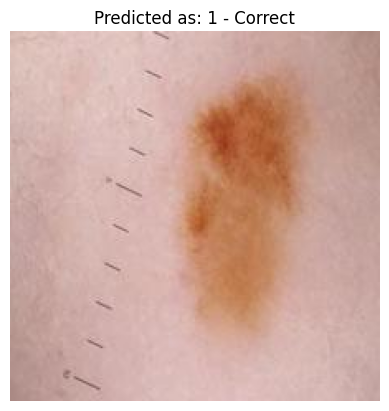

1/1 [==============================] - 0s 20ms/step
[[0.99319047 0.00680954]]
[0]
predicted_value 1


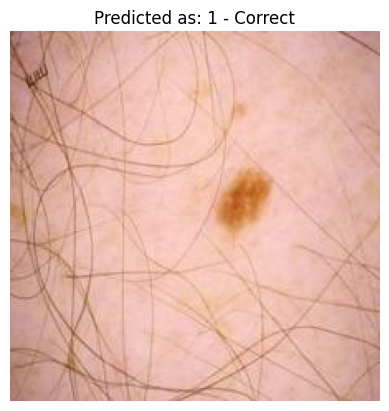

1/1 [==============================] - 0s 26ms/step
[[0.8118477  0.18815228]]
[0]
predicted_value 1


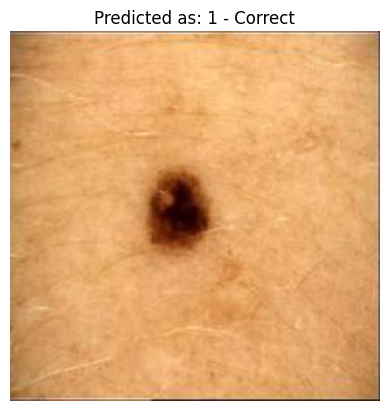

1/1 [==============================] - 0s 22ms/step
[[9.997532e-01 2.468341e-04]]
[0]
predicted_value 1


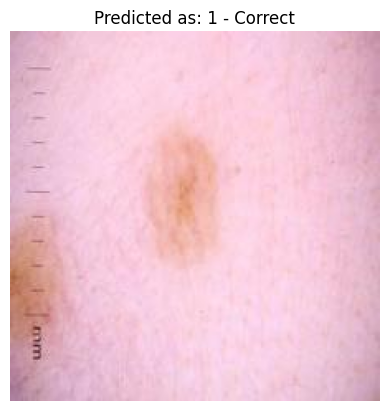

1/1 [==============================] - 0s 22ms/step
[[0.6399692 0.3600308]]
[0]
predicted_value 1


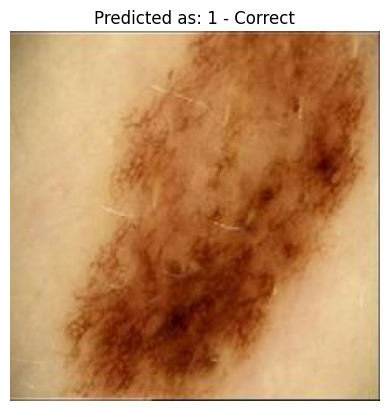

1/1 [==============================] - 0s 18ms/step
[[0.96316904 0.03683092]]
[0]
predicted_value 1


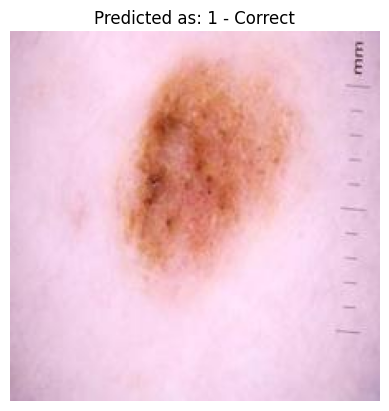

1/1 [==============================] - 0s 22ms/step
[[0.99502486 0.00497506]]
[0]
predicted_value 1


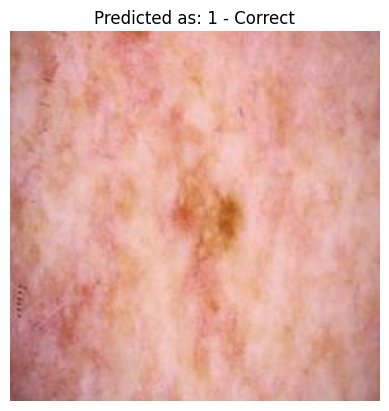

1/1 [==============================] - 0s 23ms/step
[[9.9933678e-01 6.6319085e-04]]
[0]
predicted_value 1


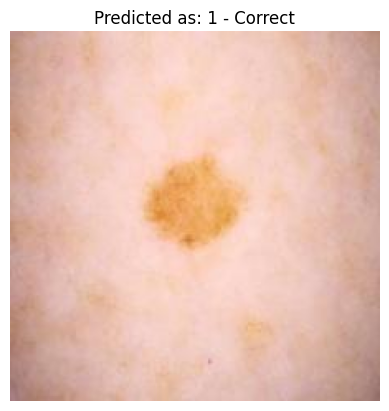

In [45]:
###### Prediction class 1 => Bening
###### Prediction class 2 => Malignant

def preprocess_image(image_path):
    img = load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img_array = img_to_array(img) / 255.0  
    img_array = np.expand_dims(img_array, axis=0) 
    return img_array

test_images_path = ['Test_images/Benign','Test_images/Malignant']

path = random.choice(test_images_path)

def real_value(path):
    if(path=='Test_images/Malignant'):
        real_value = 2 #Malignant
    else:
        real_value = 1 #Benign
    return real_value

def show_predictions(path, real_value):
    print(real_value)
    for filename in os.listdir(path):
        
        if filename.endswith(('.png', '.jpg', '.jpeg')): 
            image_path = os.path.join(path, filename)
            
            new_image = preprocess_image(image_path)
        
            predictions = model.predict(new_image)
            predicted_class = np.argmax(predictions, axis=1)
            print(predictions)
            print(predicted_class)
            plt.imshow(load_img(image_path))
            predicted_value = predicted_class[0] + 1
            print("predicted_value", predicted_value)
            if(predicted_value == real_value):
                plt.title(f"Predicted as: {predicted_value} - Correct")
            else:
                plt.title(f"Predicted as: {predicted_value} - Error")
            plt.axis('off')
            plt.show()

real_value = real_value(path)
show_predictions(path,real_value)
